In [2]:
from tinyphysics import TinyPhysicsModel, TinyPhysicsSimulator, CONTROL_START_IDX
from controllers import pid, zero
from matplotlib import pyplot as plt
import seaborn as sns

sns.set_theme()


/opt/miniconda3/envs/controls_challenge/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
def plot_rollout(sim):
  fig, ax = plt.subplots(figsize=(10, 5))
  ax.plot(sim.target_lataccel_history, label="Target Lateral Acceleration", alpha=0.5)
  ax.plot(sim.current_lataccel_history, label="Current Lateral Acceleration", alpha=0.5)
  ax.legend()
  ax.set_xlabel("Step")
  ax.set_ylabel("Lateral Acceleration")
  ax.set_title(f"Rollout {sim.controller.name}")
  plt.show()

In [4]:
model = TinyPhysicsModel("./models/tinyphysics.onnx", debug=False)
# pid_controllercontroller = pid.Controller()
zero_controller = zero.Controller()

In [5]:
sim = TinyPhysicsSimulator(model, "./data/00001.csv", controller=zero_controller, debug=False)
sim.rollout()

{'lataccel_cost': 4.516093744426455,
 'jerk_cost': 5.939194085512951,
 'total_cost': 231.7438813068357}

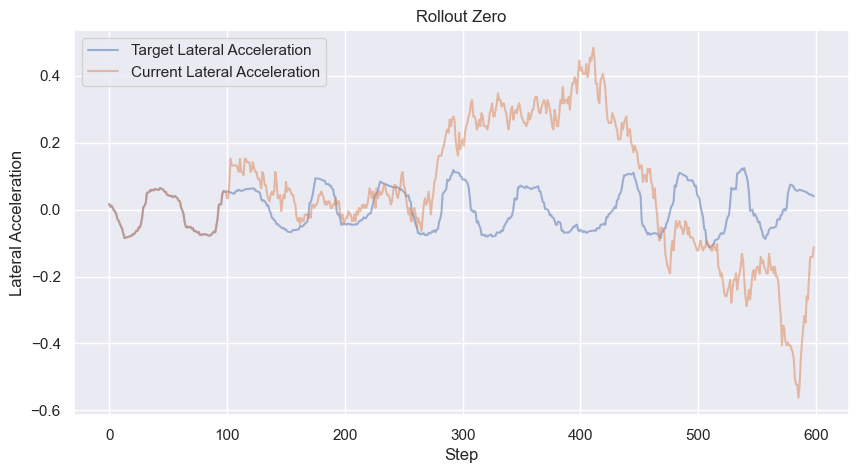

In [6]:
plot_rollout(sim)

In [7]:
model = TinyPhysicsModel("./models/tinyphysics.onnx", debug=False)
pid_controller = pid.Controller()
# controller = zero.Controller()

In [8]:
sim = TinyPhysicsSimulator(model, "./data/00001.csv", controller=pid_controller, debug=False)
sim.rollout()

{'lataccel_cost': 0.29865109656435407,
 'jerk_cost': 7.069556830820253,
 'total_cost': 22.002111659037958}

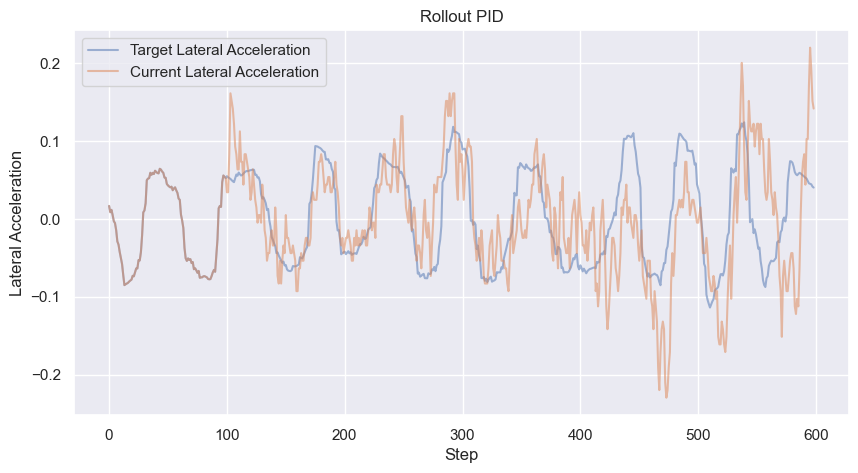

In [9]:
plot_rollout(sim)

In [11]:
sim = TinyPhysicsSimulator(model, "./data/00002.csv", controller=pid_controller, debug=False)
len(sim.data)

600

In [12]:
sim.rollout()

{'lataccel_cost': 1.0654250001934145,
 'jerk_cost': 24.470437566843334,
 'total_cost': 77.74168757651405}

In [13]:
sim.step_idx

600